<a href="https://colab.research.google.com/github/vinitakumari31/ML_Project/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt



In [ ]:
df = pd.read_csv("/content/insurance(1).csv")

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.isnull().sum()


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

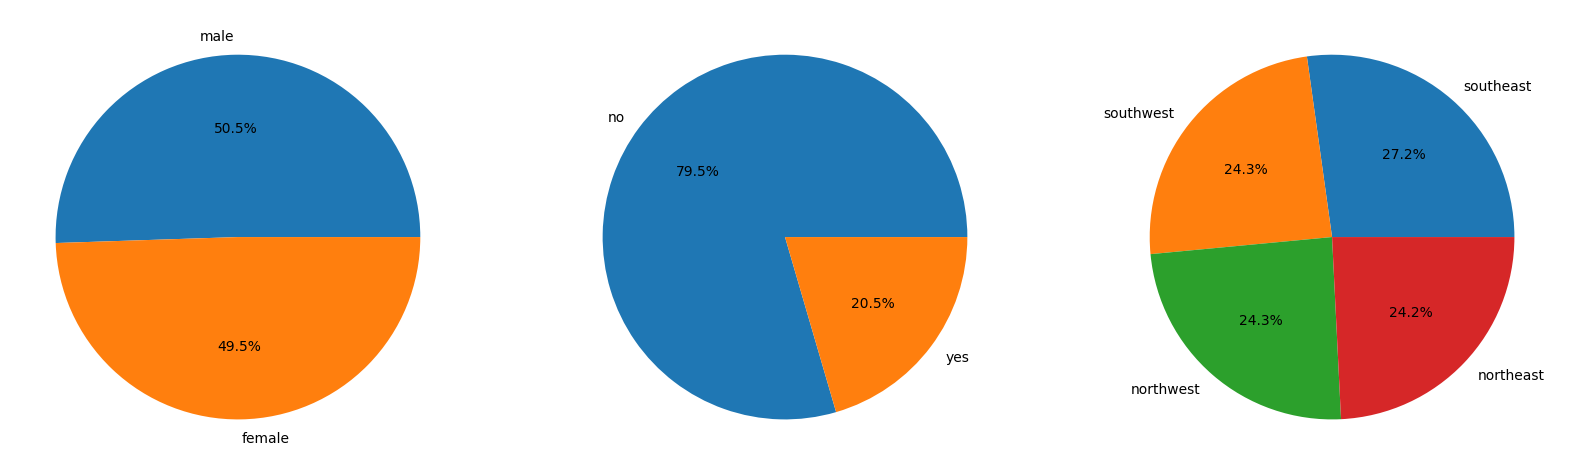

In [ ]:
features = ['sex', 'smoker', 'region']

plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
	plt.subplot(1, 3, i + 1)

	x = df[col].value_counts()
	plt.pie(x.values,
			labels=x.index,
			autopct='%1.1f%%')

plt.show()


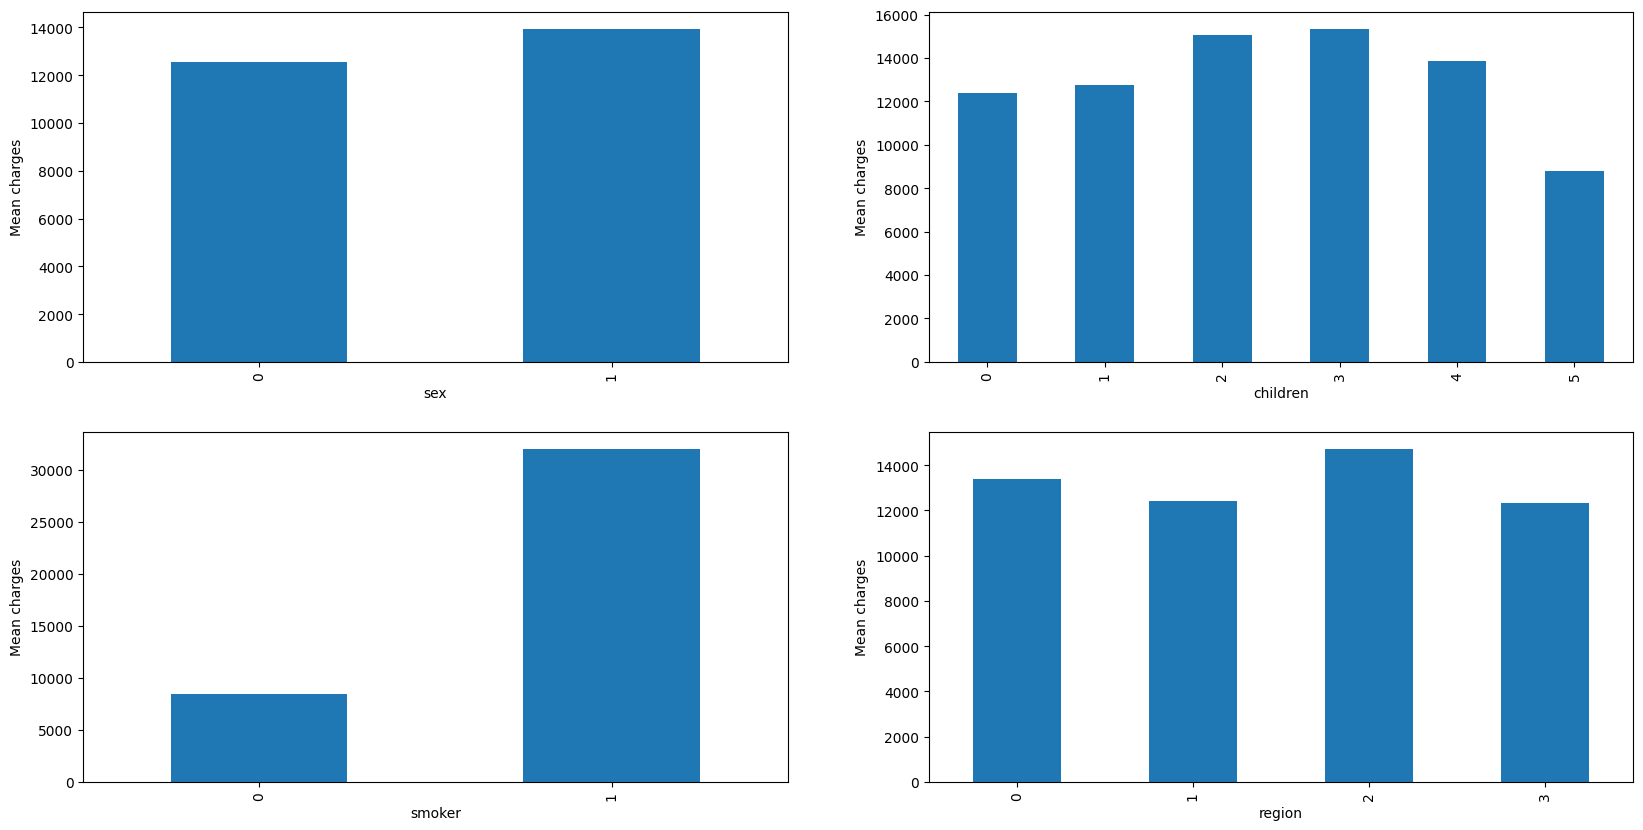

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Assuming df is your DataFrame containing the data

# Label Encoding for 'sex', 'smoker', and 'region' columns
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['region'] = label_encoder.fit_transform(df['region'])

features = ['sex', 'children', 'smoker', 'region']

plt.figure(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col).mean()['charges'].plot.bar()
    plt.xlabel(col)
    plt.ylabel('Mean charges')
plt.show()


In [ ]:
import matplotlib.pyplot as plt

(<Figure size 2000x1000 with 1 Axes>, <Axes: >)

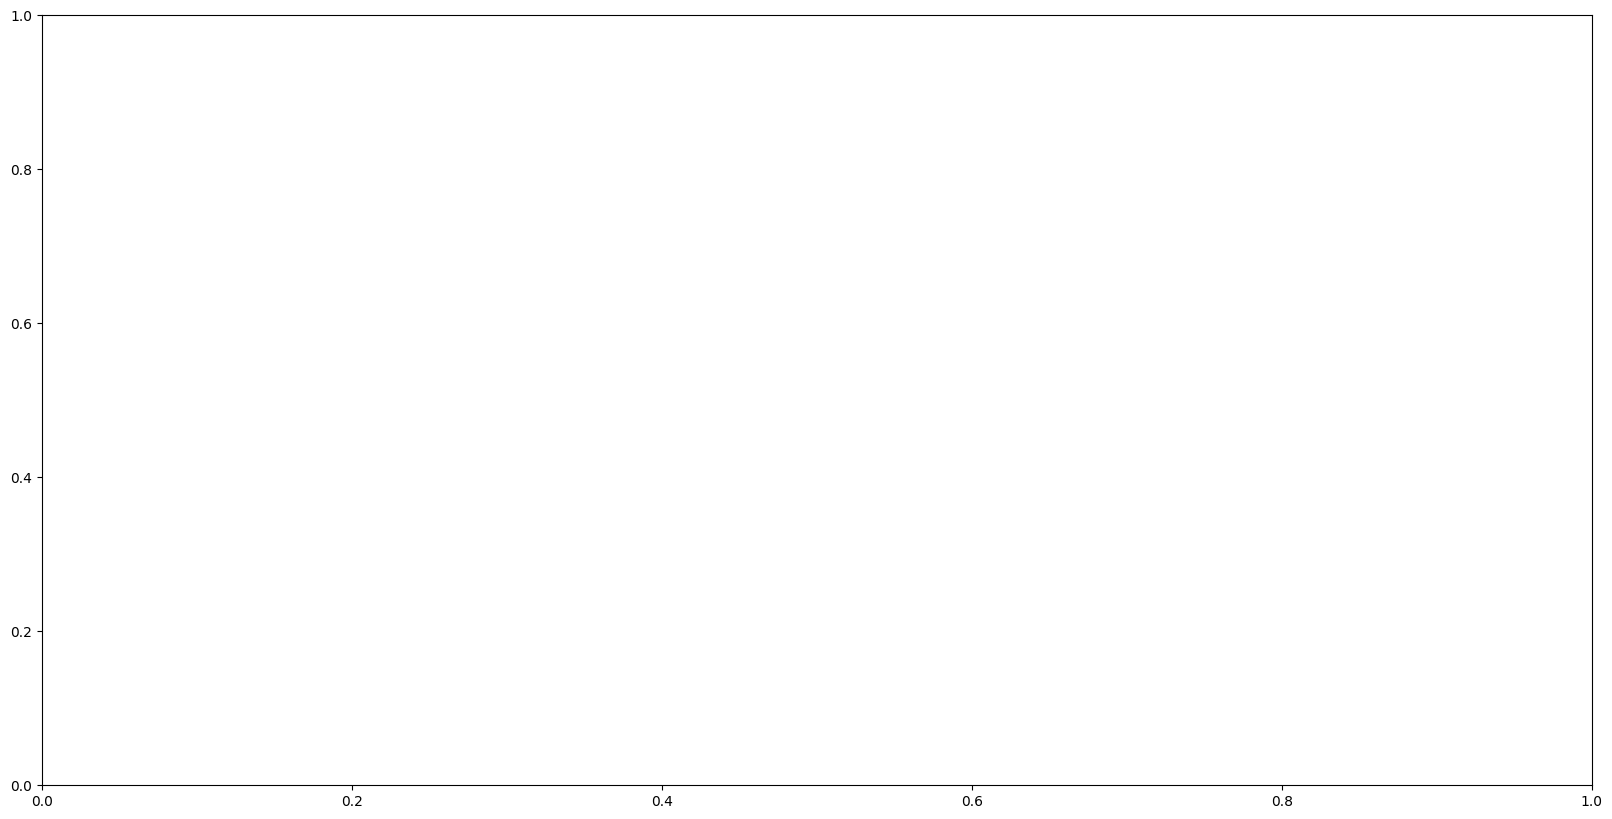

In [ ]:
import matplotlib.pyplot as plt

# ...

plt.subplots(figsize=(20, 10))
# ...

In [ ]:
!pip install seaborn
import seaborn as sns

# Rest of the code remains the same.

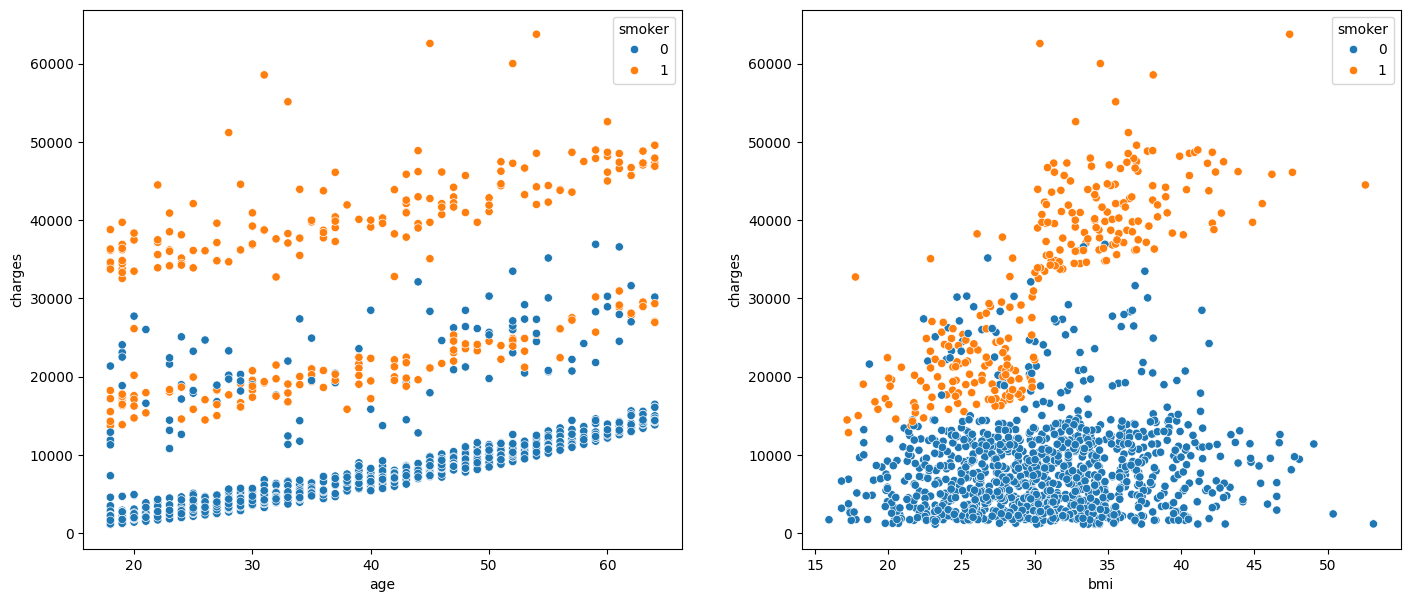

In [ ]:
features = ['age', 'bmi']

plt.figure(figsize=(17, 7))
for i, col in enumerate(features):
	plt.subplot(1, 2, i + 1)
	sns.scatterplot(data=df, x=col,
				y='charges',
				hue='smoker')
plt.show()


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

<Axes: ylabel='age'>

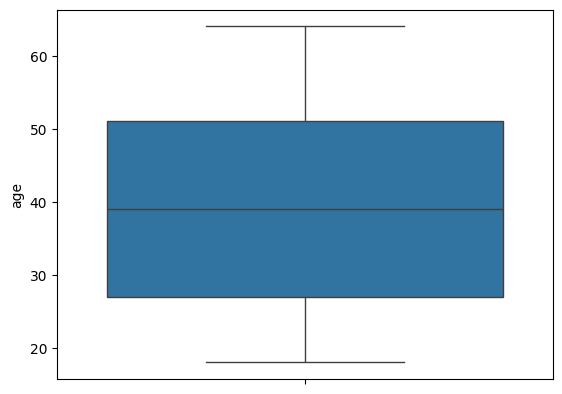

In [ ]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])


<Axes: ylabel='bmi'>

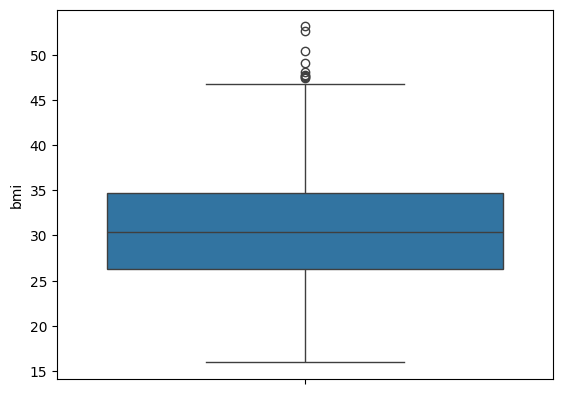

In [ ]:
sns.boxplot(df['bmi'])


In [ ]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)


13.674999999999994
47.31500000000001


<Axes: ylabel='bmi'>

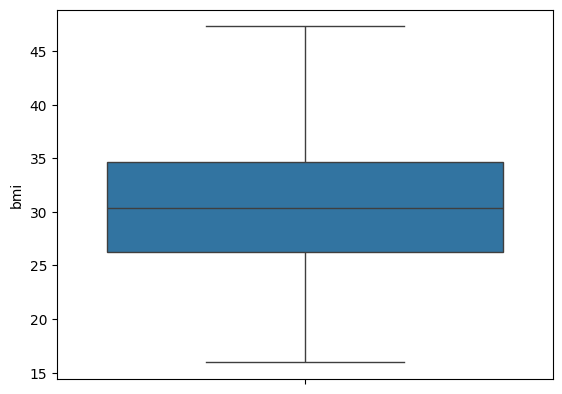

In [ ]:
#!pip install feature-engine
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])


In [ ]:
df['bmi'].skew()
df['age'].skew()



0.054780773126998195

In [ ]:
df['sex']=df['sex'].map({'male':0,'female':1})

df['smoker']=df['smoker'].map({'yes':1,'no':0})

df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})

In [ ]:
df['sex']=df['sex'].map({'male':0,'female':1})
df['smoker']=df['smoker'].map({'yes':1,'no':0})
df['region']=df['region'].map({'northwest':0, 'northeast':1,'southeast':2,'southwest':3})


In [ ]:
df.corr()

ValueError: could not convert string to float: 'female'

In [ ]:
import pandas as pd

In [ ]:
!pip uninstall scikit-learn
!pip install scikit-learn


Found existing installation: scikit-learn 1.4.2
Uninstalling scikit-learn-1.4.2:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.4.2.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? 

In [ ]:
X=df.drop(['charges'],axis=1)

Y=df[['charges']]

from sklearn.linear_model import LinearRegression

from sklearn.svm import SVR

from sklearn.ensemble import RandomForestRegressor



from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score

l1=[]

l2=[]

l3=[]

cvs=0

for i in range(40,50):

 xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=i)

 lrmodel=LinearRegression()

 lrmodel.fit(xtrain,ytrain)

 l1.append(lrmodel.score(xtrain,ytrain))

 l2.append(lrmodel.score(xtest,ytest))

 cvs=(cross_val_score(lrmodel,X,Y,cv=5,)).mean()

 l3.append(cvs)

 df1=pd.DataFrame({'train acc':l1,'test acc':l2,'cvs':l3})

 df1

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Assuming 'data' is your DataFrame containing categorical variables
# Let's say 'sex', 'smoker', and 'region' are categorical variables

# Perform one-hot encoding for categorical variables
data_encoded = pd.get_dummies(df, columns=['sex', 'smoker', 'region'])

# Assuming 'target' is your target variable
X = data_encoded.drop('sex_female', axis=1)
Y = data_encoded['sex_female']

# Assuming 'target' is your target variable
X = data_encoded.drop('sex_male', axis=1)
Y = data_encoded['sex_male']

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Fit the linear regression model
lrmodel = LinearRegression()
lrmodel.fit(xtrain, ytrain)

# Evaluate the model
train_score = lrmodel.score(xtrain, ytrain)
test_score = lrmodel.score(xtest, ytest)

print("Training Score:", train_score)
print("Testing Score:", test_score)


In [ ]:
print(data_encoded.columns)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score

# Assuming X and Y are defined as shown in your code

# One-hot encoding categorical variables in X
X_encoded = pd.get_dummies(X)

l1 = []
l2 = []
l3 = []

for i in range(40, 50):
    xtrain, xtest, ytrain, ytest = train_test_split(X_encoded, Y, test_size=0.2, random_state=i)
    lrmodel = LinearRegression()
    lrmodel.fit(xtrain, ytrain)
    l1.append(lrmodel.score(xtrain, ytrain))
    l2.append(lrmodel.score(xtest, ytest))
    cvs = (cross_val_score(lrmodel, X_encoded, Y, cv=5)).mean()
    l3.append(cvs)

df1 = pd.DataFrame({'train acc': l1, 'test acc': l2, 'cvs': l3})
print(df1)


In [ ]:
pip install scikit-learn


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score

# Assuming X and Y are defined
# Define X and Y here

# One-hot encode categorical variables in X
X_encoded = pd.get_dummies(X)

# Splitting the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X_encoded, Y, test_size=0.2, random_state=42)

# Create and fit RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(xtrain, ytrain)

# Predictions on training and testing sets
ypred_train = rf_model.predict(xtrain)
ypred_test = rf_model.predict(xtest)

# Evaluate R^2 scores
train_r2 = r2_score(ytrain, ypred_train)
test_r2 = r2_score(ytest, ypred_test)
cv_score = cross_val_score(rf_model, X_encoded, Y, cv=5).mean()

# Printing Results
print("Results:")
print("Training set R^2 score:", train_r2)
print("Testing set R^2 score:", test_r2)
print("Cross-validation mean R^2 score:", cv_score)


In [ ]:
from sklearn.metrics import r2_score
svrmodel=SVR()
svrmodel.fit(xtrain,ytrain)
ypredtrain1=svrmodel.predict(xtrain)
ypredtest1=svrmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain1))
print(r2_score(ytest,ypredtest1))
#print(cross_val_score(svrmodel,X,Y,cv=5,).mean())

In [ ]:
!pip install scikit-learn

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.metrics import r2_score
from sklearn.svm import SVR

svrmodel = SVR()
svrmodel.fit(xtrain, ytrain)
ypredtrain1 = svrmodel.predict(xtrain)
ypredtest1 = svrmodel.predict(xtest)
print(r2_score(ytrain, ypredtrain1))
print(r2_score(ytest, ypredtest1))
print(cross_val_score(svrmodel, X, Y, cv=5).mean())

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Load your data into variables X and Y
# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
df.drop(df[['sex','region']],axis=1,inplace=True)
Xf=df.drop(df[['charges']],axis=1)
X=df.drop(df[['charges']],axis=1)
xtrain,xtest,ytrain,ytest=train_test_split(Xf,Y,test_size=0.2,random_state=42)
finalmodel=XGBRegressor(n_estimators=15,max_depth=3,gamma=0)
finalmodel.fit(xtrain,ytrain)
ypredtrain4=finalmodel.predict(xtrain)
ypredtest4=finalmodel.predict(xtest)
print(r2_score(ytrain,ypredtrain4))
print(r2_score(ytest,ypredtest4))
print(cross_val_score(finalmodel,X,Y,cv=5,).mean())


In [ ]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix

# Assuming X and Y are defined as shown in your code

# One-hot encoding categorical variables in X
X_encoded = pd.get_dummies(X)

l1 = []
l2 = []
l3 = []
conf_matrices = []

for i in range(40, 50):
    xtrain, xtest, ytrain, ytest = train_test_split(X_encoded, Y, test_size=0.2, random_state=i)
    lrmodel = LinearRegression()
    lrmodel.fit(xtrain, ytrain)
    l1.append(lrmodel.score(xtrain, ytrain))
    l2.append(lrmodel.score(xtest, ytest))
    cvs = (cross_val_score(lrmodel, X_encoded, Y, cv=5)).mean()
    l3.append(cvs)

    # Calculate confusion matrix
    predictions = lrmodel.predict(xtest)
    binary_predictions = (predictions > 0.5).astype(int)
    conf_matrices.append(confusion_matrix(ytest, binary_predictions))

df1 = pd.DataFrame({'train acc': l1, 'test acc': l2, 'cvs': l3, 'confusion matrix': conf_matrices})
print(df1)


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate Mean Absolute Error
mae = mean_absolute_error(ytest, ypred_test)

# Calculate Mean Squared Error
mse = mean_squared_error(ytest, ypred_test)

# Calculate Root Mean Squared Error
rmse = mean_squared_error(ytest, ypred_test, squared=False)

# Printing additional results
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
